In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Read the dataset

# Save it into a dataframe called "leads"
leads = pd.read_csv("/Users/rahulkumar/Desktop/Leads.csv")

In [3]:
# Look at the first few entries
leads.head()
# head

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Inspect the shape of the dataset
leads.shape

(9240, 37)

In [5]:
# Inspect the different columns in the dataset
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

As you can see, the feature variables are quite intuitive. If you don't understand them completely, please refer to the data dictionary.

In [12]:
# Check the summary of the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [14]:
# Check the info to see the types of the feature variables and the null values present
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

## Step 1: Data Cleaning and Preparation

In [18]:
# 1. EDA: Understanding the dataset

print("Dataset shape:", leads.shape)
print("\nColumn-wise missing values percentage:")
missing_percentage = (leads.isnull().sum() / len(leads)) * 100
print(missing_percentage)

Dataset shape: (9240, 37)

Column-wise missing values percentage:
Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    

In [20]:
columns_to_drop = missing_percentage[missing_percentage > 40].index
print("\nColumns dropped due to >40% missing values:", list(columns_to_drop))
leads.drop(columns=columns_to_drop, inplace=True)


Columns dropped due to >40% missing values: ['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [22]:
for col in leads.select_dtypes(include=['object']).columns:
    if 'Select' in leads[col].unique():
        print(f"Replacing 'Select' in column {col} with NaN")
        # Replace 'Select' with NaN
        leads[col] = leads[col].replace('Select', np.nan)
        # Fill NaN with the mode of the column
        leads[col] = leads[col].fillna(leads[col].mode()[0])

Replacing 'Select' in column Specialization with NaN
Replacing 'Select' in column How did you hear about X Education with NaN
Replacing 'Select' in column Lead Profile with NaN
Replacing 'Select' in column City with NaN


As you can see there are a lot of columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 40% missing values as they are of no use to us.

In [25]:
# As you can see there are a lot of columns which have high number of missing values. 
# Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's 
# eliminate the columns having greater than 40% missing values as they are of no use to us.
# However, you are free to change this threshold as per your needs.
# This is a good practice to remove columns having a lot of missing values as they are not very useful for analysis.
# So if your approach is not giving good results, you can change this threshold to 50% or 60% as per your understanding 
# and domain knowledge of the dataset.

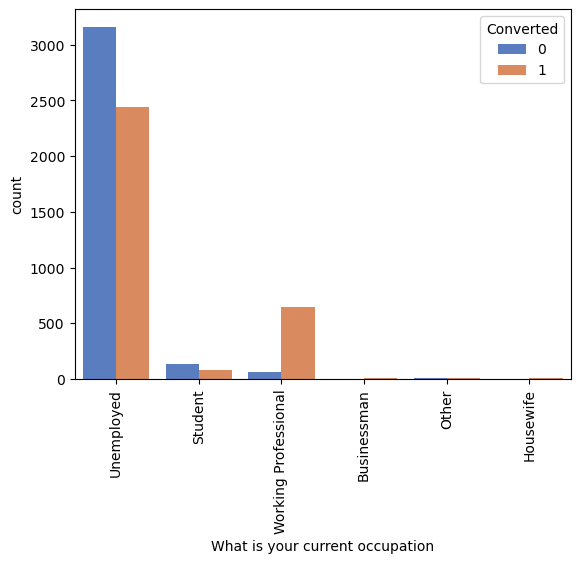

In [27]:
#Current Occupation Distribution against number of Converted

sns.countplot(data=leads,x='What is your current occupation',hue='Converted', palette='muted')
plt.xticks(rotation=90)
plt.show()

most of the people who apply are unemployed, but as for working professionals from the applied ones most are converted

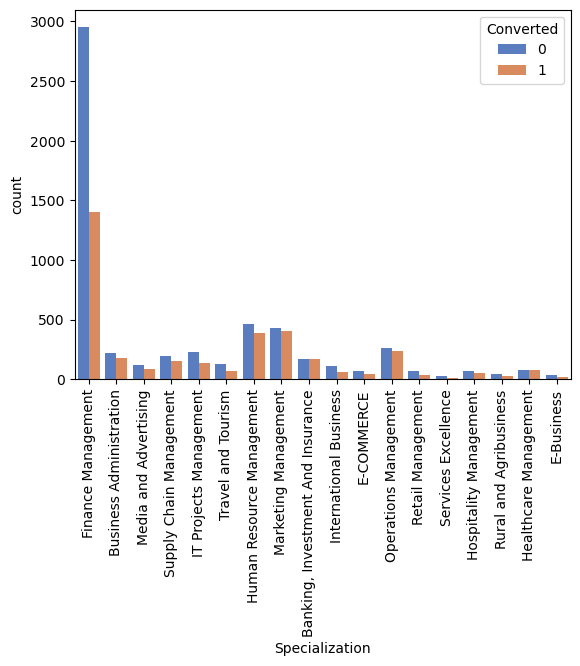

In [30]:
#Plotting Specialization against Converted and not converted
sns.countplot(data=leads,x='Specialization',hue='Converted', palette='muted')
plt.xticks(rotation=90)
plt.show()

Again converted are almost equal in finance, hr, marketing management specializations followed by Operations, IT projects, Business admin and supply chain


In [33]:
# Check the number of null values again
print("\nColumn-wise missing values percentage:")
missing_percentage = (leads.isnull().sum() / len(leads)) * 100
print(missing_percentage)


Column-wise missing values percentage:
Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                    0.000000
How did you hear about X Education                0.000000
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search          

As you might be able to interpret, the variable `City` won't be of any use in our analysis. So it's best that we drop it.

In [36]:
# As you might be able to interpret, the variable `City` won't be of any use in our analysis. 
# So it's best that we drop it.
# If you are of the personal opinion that the variable `City` is important, you can keep it as it is an online education platform
# and the city of the lead might play an important role in the conversion rate.
# However, in this case, I will drop it. Feel free to keep it if you think it is important.

In [38]:
# drop City
leads.drop('City', axis=1, inplace=True)

In [40]:
# Same goes for the variable 'Country'

# drop Country
leads.drop('Country', axis=1, inplace=True)

Now recall that there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [43]:
# Get the value counts of all the columns
# Select all the columns which have 'category' datatype

for column in leads.columns:
    print(leads[column].astype('category').value_counts())
    print("__________________________________________________")

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
__________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
__________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
__

The following three columns now have the level 'Select'. Let's check them once again.

In [46]:
# apply v_c() on Lead Profile col
leads['Lead Profile'].value_counts()

Lead Profile
Potential Lead                 8468
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

Clearly the levels `Lead Profile` and `How did you hear about X Education` have a lot of rows which have the value `Select` which is of no use to the analysis so it's best that we drop them.

In [49]:
# drop Lead Profile and How did you hear about X Education columns
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis=1, inplace=True)

Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis.

Also, the variable `What matters most to you in choosing a course` has the level `Better Career Prospects` `6528` times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [55]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'
leads = leads[~pd.isnull(leads['What matters most to you in choosing a course'])]

In [57]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

Tags                                             725
TotalVisits                                      130
Page Views Per Visit                             130
Last Activity                                    103
Lead Source                                       36
Prospect ID                                        0
Newspaper Article                                  0
A free copy of Mastering The Interview             0
I agree to pay the amount through cheque           0
Get updates on DM Content                          0
Update me on Supply Chain Content                  0
Receive More Updates About Our Courses             0
Through Recommendations                            0
Digital Advertisement                              0
Newspaper                                          0
X Education Forums                                 0
Search                                             0
Magazine                                           0
Lead Number                                   

Now, there's the column `What is your current occupation` which has a lot of null values. Now you can drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column `What is you current occupation`.

In [60]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

Tags                                             725
TotalVisits                                      130
Page Views Per Visit                             130
Last Activity                                    103
Lead Source                                       36
Prospect ID                                        0
Newspaper Article                                  0
A free copy of Mastering The Interview             0
I agree to pay the amount through cheque           0
Get updates on DM Content                          0
Update me on Supply Chain Content                  0
Receive More Updates About Our Courses             0
Through Recommendations                            0
Digital Advertisement                              0
Newspaper                                          0
X Education Forums                                 0
Search                                             0
Magazine                                           0
Lead Number                                   

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [63]:
# Drop the null value rows in the column 'TotalVisits'
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [65]:
# Check the null values again

leads.isnull().sum().sort_values(ascending=False)

Tags                                             712
Lead Source                                       29
Prospect ID                                        0
Magazine                                           0
A free copy of Mastering The Interview             0
I agree to pay the amount through cheque           0
Get updates on DM Content                          0
Update me on Supply Chain Content                  0
Receive More Updates About Our Courses             0
Through Recommendations                            0
Digital Advertisement                              0
Newspaper                                          0
X Education Forums                                 0
Newspaper Article                                  0
Search                                             0
Lead Number                                        0
What matters most to you in choosing a course      0
What is your current occupation                    0
Specialization                                

In [67]:
# Drop the null values rows in the column 'Lead Source'

leads = leads[~pd.isnull(leads['Lead Source'])]

In [69]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

Tags                                             706
Prospect ID                                        0
Lead Number                                        0
A free copy of Mastering The Interview             0
I agree to pay the amount through cheque           0
Get updates on DM Content                          0
Update me on Supply Chain Content                  0
Receive More Updates About Our Courses             0
Through Recommendations                            0
Digital Advertisement                              0
Newspaper                                          0
X Education Forums                                 0
Newspaper Article                                  0
Magazine                                           0
Search                                             0
What matters most to you in choosing a course      0
What is your current occupation                    0
Specialization                                     0
Last Activity                                 

In [71]:
# Drop the null values rows in the column 'Specialization'
leads = leads[~pd.isnull(leads['Specialization'])]


In [73]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

Tags                                             706
Prospect ID                                        0
Lead Number                                        0
A free copy of Mastering The Interview             0
I agree to pay the amount through cheque           0
Get updates on DM Content                          0
Update me on Supply Chain Content                  0
Receive More Updates About Our Courses             0
Through Recommendations                            0
Digital Advertisement                              0
Newspaper                                          0
X Education Forums                                 0
Newspaper Article                                  0
Magazine                                           0
Search                                             0
What matters most to you in choosing a course      0
What is your current occupation                    0
Specialization                                     0
Last Activity                                 

Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [76]:
print(len(leads.index))
print(len(leads.index)/9240)

6372
0.6896103896103896


We still have around 69% of the rows which seems good enough.

In [79]:
# Let's look at the dataset again

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables.

In [82]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


### Dummy variable creation

The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [85]:
# Check the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [87]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [89]:
# Let's take a look at the dataset again

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


### Test-Train Split

The next step is to split the dataset into training an testing sets.

In [92]:
# Put all the feature variables in X

X = leads.drop('Converted', axis=1)
X.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.5,Email Opened,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [94]:
# Put the target variable in y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [96]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [99]:
# Scale the three numeric features present in the dataset

fit_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
scaler = MinMaxScaler()
X_train[fit_cols] = scaler.fit_transform(X_train[fit_cols])
X_train.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
4170,753f7d29-a44d-4e3f-8d75-0671d8fd7ff8,619894,Landing Page Submission,Direct Traffic,No,No,0.015936,0.408891,0.2500,SMS Sent,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,SMS Sent
6812,6c7af295-b2f5-4407-8534-78dfebd429ef,597513,Landing Page Submission,Direct Traffic,No,No,0.063745,0.539613,0.1250,Email Opened,...,No,No,No,No,NaN,No,No,No,Yes,Email Opened
7717,8ddf7c48-0c59-46d3-bf42-a1f2c2c5949f,590656,API,Olark Chat,No,No,0.000000,0.000000,0.0000,Email Opened,...,No,No,No,No,NaN,No,No,No,No,Email Opened
207,fad4be87-d418-4746-b951-cd405a98b631,658288,API,Organic Search,No,No,0.019920,0.157570,0.3125,Page Visited on Website,...,No,No,No,No,Busy,No,No,No,No,Modified
2044,77ff20ad-4a83-4016-82f2-838db123753e,639937,API,Google,No,No,0.007968,0.163292,0.1250,Converted to Lead,...,No,No,No,No,NaN,No,No,No,No,Modified


### Looking at the correlations

Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

In [102]:
# Select only numeric columns
numeric_data = leads.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_table = numeric_data.corr()

# Display the correlation table
print(correlation_table)

                             Lead Number  Converted  TotalVisits  \
Lead Number                     1.000000   0.097732     0.006902   
Converted                       0.097732   1.000000     0.009349   
TotalVisits                     0.006902   0.009349     1.000000   
Total Time Spent on Website     0.037424   0.313277     0.212987   
Page Views Per Visit            0.035801  -0.063002     0.499610   

                             Total Time Spent on Website  Page Views Per Visit  
Lead Number                                     0.037424              0.035801  
Converted                                       0.313277             -0.063002  
TotalVisits                                     0.212987              0.499610  
Total Time Spent on Website                     1.000000              0.304302  
Page Views Per Visit                            0.304302              1.000000  


## Step 2: Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [105]:
for col in leads.select_dtypes(include=['object']).columns:
    if 'Select' in leads[col].unique():
        print(f"Replacing 'Select' in column {col} with NaN")
        # Replace 'Select' with NaN
        leads[col] = leads[col].replace('Select', np.nan)
        # Fill NaN with the mode of the column
        leads[col] = leads[col].fillna(leads[col].mode()[0])

In [107]:
# Import 'LogisticRegression' and create a LogisticRegression object
logreg = LogisticRegression()

In [109]:
# Import RFE and select 15 variables
rfe = RFE(estimator=logreg, n_features_to_select=15) # n_features_to_select is the number of features you want to select
rfe = rfe.fit(X_train, y_train)

ValueError: could not convert string to float: '753f7d29-a44d-4e3f-8d75-0671d8fd7ff8'

In [111]:
X_train = pd.get_dummies(X_train, drop_first=True)

# Ensure all data is numeric now
print(X_train.dtypes)

# Re-run RFE after cleaning the data
rfe.fit(X_train, y_train)

# Extract selected features
selected_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Selected': rfe.get_support(),
    'Ranking': rfe.ranking_
})

# Display the selected features
print(selected_features)

Lead Number                                             int64
TotalVisits                                           float64
Total Time Spent on Website                           float64
Page Views Per Visit                                  float64
Prospect ID_0011f23e-9fd9-4256-b316-efc2e2639b0d         bool
                                                       ...   
Last Notable Activity_Page Visited on Website            bool
Last Notable Activity_SMS Sent                           bool
Last Notable Activity_Unreachable                        bool
Last Notable Activity_Unsubscribed                       bool
Last Notable Activity_View in browser link Clicked       bool
Length: 4561, dtype: object
                                                Feature  Selected  Ranking
0                                           Lead Number     False     4547
1                                           TotalVisits     False        8
2                           Total Time Spent on Website      True

In [112]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support]

AttributeError: 'RFE' object has no attribute 'support'

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [ ]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [ ]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm0 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm0.fit()
res.summary()

There are quite a few variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [ ]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

VIFs seem to be in a decent range except for three variables. 



In [ ]:
# Let's first drop the variable `Lead Source_Reference` since it has a high p-value as well as a high VIF.
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [ ]:
# Refit the model with the new set of features

#logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
#logm1.fit().summary()

# Fit the model
logm1 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
logm1_result = logm1.fit()

# Display the summary
print(logm1_result.summary())

The variable `Lead Profile_Dual Specialization Student	` also needs to be dropped.

In [ ]:
# Make a VIF dataframe for all the variables present






The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with `Last Notable Activity_Had a Phone Conversation`.

In [ ]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

In [ ]:
# Refit the model with the new set of features

X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)# Refit the model with the new set of features

logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

Drop `What is your current occupation_Housewife`.

In [ ]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)# Refit the model with the new set of features

logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()

In [ ]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)# Refit the model with the new set of features

logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()

Drop `What is your current occupation_Working Professional`.

All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

We are good to go!

## Step 3: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [ ]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

In [ ]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [ ]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [ ]:
# Create confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

In [ ]:
# Predicted     not_churn    churn
# Actual
# not_churn        2543      463
# churn            692       1652  

In [ ]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

In [ ]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Calculate the sensitivity

TP/(TP+FN)

In [ ]:
# Calculate the specificity

TN/(TN+FP)

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [ ]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [ ]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

In [ ]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [ ]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

In [ ]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [ ]:
# Let's create the confusion matrix once again

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [ ]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Calculate Sensitivity

TP/(TP+FN)

In [ ]:
# Calculate Specificity

TN/(TN+FP)

This cutoff point seems good to go!

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [ ]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = 
            scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [ ]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

In [ ]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [ ]:
# Check X_test_sm

X_test_sm

In [ ]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 
                     'Last Notable Activity_Had a Phone Conversation'], 1, 
                                inplace = True)

In [ ]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [ ]:
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head

y_pred_1.head()

In [ ]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [ ]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
# Check 'y_pred_final'

y_pred_final.head()

In [ ]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [ ]:
# Let's see the head of y_pred_final

y_pred_final.head()

In [ ]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [ ]:
# Check y_pred_final

y_pred_final.head()

In [ ]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Calculate sensitivity
TP / float(TP+FN)

In [ ]:
# Calculate specificity
TN / float(TN+FP)

## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [ ]:
#Looking at the confusion matrix again

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

##### Precision
TP / TP + FP

In [ ]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

##### Recall
TP / TP + FN

In [ ]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

### Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

In [ ]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [ ]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

In [ ]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Calculate Precision

TP/(TP+FP)

In [ ]:
# Calculate Recall

TP/(TP+FN)

This cutoff point seems good to go!

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [ ]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [ ]:
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head

y_pred_1.head()

In [ ]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [ ]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
# Check 'y_pred_final'

y_pred_final.head()

In [ ]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [ ]:
# Let's see the head of y_pred_final

y_pred_final.head()

In [ ]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [ ]:
# Check y_pred_final

y_pred_final.head()

In [ ]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Calculate Precision

TP/(TP+FP)

In [ ]:
# Calculate Recall

TP/(TP+FN)